<a href="https://colab.research.google.com/github/anissval/colabs-data-analytics-/blob/main/proyectoFinal/BA_TRABAJO_FINAL_PREDICCION_COMPRA_VALDIVIEZO_ANAHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

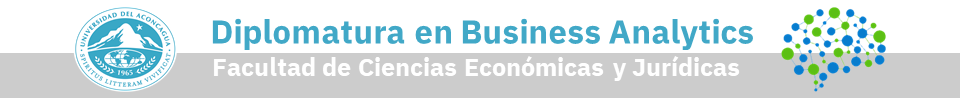

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Predicción de compra - Customer propensity to purchase

</font>
</center>

***Alumna : Valdiviezo Anahí Ayelén***

## Descripción del dataset

**El dataset pertenece a una compañía que tiene una tienda en su página web.**

**Que tan propenso a comprar puede ser un cliente potencial es muy importante para realizar acciones en el momento y campañas de re-target que aumenten el beneficio de la organización y optimizar el gasto de marketing.**


---

Administrative: El número de páginas administrativas que ha visitado el usuario.

Administrative_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

Informational: El número de páginas de información que ha visitado el usuario.

Informational_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

ProductRelated: El número de páginas de Producto que ha visitado el usuario.

ProductRelated_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

BounceRates: Porcentaje de visitantes que entran a la web mediante la página que se ingresó.

ExitRates: Porcentaje de vistas de página que terminan en la página por la que se ingresó.

PageValues: Valoración interna de la página.

SpecialDay: Cercanía en el tiempo a un día festivo.

Month: Mes.

OperatingSystems: Sistema operativo.

Browser: Navegador.

Region: Region.

TrafficType: Tipo de tráfico.

VisitorType: Tipo de visitante (nuevo o recurrente).

Weekend: True/False si es fin de semana.

Revenue: True/False si el cliente ha comprado.









---



# **Explicacion del trabajo realizado**

Empece instalando e importando todas librerias necesarias para llevar a cabo mi proyecto.

Utilizando el conjunto de datos provisto, una vez realizada la carga de los datos, procedi a realizar la limpieza de los datos, no fue necesario eliminar  columnas/filas de datos ya que los datos estaban impecables y listos para ser usados.

Procedi a realizar un EDA utilizando la libreria **sweetviz** para familiarizarme con el conjunto de datos. 

Configure mi ambiente para generar los modelos, hice uso de la libreria **pycaret** y realice la prediccion de clasificacion utilizando el modelo de **random forest** al principio, luego opte por otro modelo ya que el primero no fue optimo. Genere los modelos, realice los graficos correspondientes para analizar los resultados obtenidos.

En cierto punto analizando los features mas importantes para el modelo borre outliers de mi conjunto datos del feature mas importante para asi poder mejorar los valores de las metricas.

 Ya llegando a la ultima instancia fui agregando comentarios acerca de los resultados obtenidos y procedi a la prediccion de los datos no vistos, finalice mi modelo y lo guarde para posteriores usos.



---



# ***Habilitando librerias necesarias para el proyecto***

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install sweetviz --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sweetviz as sv

In [4]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [5]:
import pandas as pd

In [6]:
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

# Habilitando PyCaret

In [8]:
from pycaret.classification import *

In [9]:
from pycaret.classification.oop import *
LOGGER.disabled = True

# Carga de datos

In [10]:
clientes_train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_train.csv",index_col = 0)
clientes_test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_test.csv",index_col = 0)

#**Preprocesamiento de datos**


In [11]:
nombres_columnas = ["pag_administrativas_visitadas", "pag_administrativas_duracion","pag_informativas_visitadas","pag_informativas_duracion","pag_productos_visitadas","pag_productos_duracion","tasa_rebote","tasa_salida","valor_pagina","dia_especial","mes","sistema_operativo","navegador","region","tipo_trafico","tipo_visitante","fin_semana","ingresos"]

In [12]:
clientes_train.columns = nombres_columnas 

In [13]:
clientes_test.columns = nombres_columnas

In [14]:
clientes_train.head()

,pag_administrativas_visitadas,pag_administrativas_duracion,pag_informativas_visitadas,pag_informativas_duracion,pag_productos_visitadas,pag_productos_duracion,tasa_rebote,tasa_salida,valor_pagina,dia_especial,mes,sistema_operativo,navegador,region,tipo_trafico,tipo_visitante,fin_semana,ingresos
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,False
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,False
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,True
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [15]:
clientes_test.head()

,pag_administrativas_visitadas,pag_administrativas_duracion,pag_informativas_visitadas,pag_informativas_duracion,pag_productos_visitadas,pag_productos_duracion,tasa_rebote,tasa_salida,valor_pagina,dia_especial,mes,sistema_operativo,navegador,region,tipo_trafico,tipo_visitante,fin_semana,ingresos
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [16]:
clientes_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9248 entries, 0 to 9247
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pag_administrativas_visitadas  9248 non-null   int64  
 1   pag_administrativas_duracion   9248 non-null   float64
 2   pag_informativas_visitadas     9248 non-null   int64  
 3   pag_informativas_duracion      9248 non-null   float64
 4   pag_productos_visitadas        9248 non-null   int64  
 5   pag_productos_duracion         9248 non-null   float64
 6   tasa_rebote                    9248 non-null   float64
 7   tasa_salida                    9248 non-null   float64
 8   valor_pagina                   9248 non-null   float64
 9   dia_especial                   9248 non-null   float64
 10  mes                            9248 non-null   object 
 11  sistema_operativo              9248 non-null   int64  
 12  navegador                      9248 non-null   i

In [17]:
clientes_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 3081
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pag_administrativas_visitadas  3082 non-null   int64  
 1   pag_administrativas_duracion   3082 non-null   float64
 2   pag_informativas_visitadas     3082 non-null   int64  
 3   pag_informativas_duracion      3082 non-null   float64
 4   pag_productos_visitadas        3082 non-null   int64  
 5   pag_productos_duracion         3082 non-null   float64
 6   tasa_rebote                    3082 non-null   float64
 7   tasa_salida                    3082 non-null   float64
 8   valor_pagina                   3082 non-null   float64
 9   dia_especial                   3082 non-null   float64
 10  mes                            3082 non-null   object 
 11  sistema_operativo              3082 non-null   int64  
 12  navegador                      3082 non-null   i

In [18]:
round(clientes_train.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
pag_administrativas_visitadas,9248.0,2.32,3.31,0.0,0.00,1.00,4.00,27.00
pag_administrativas_duracion,9248.0,82.01,178.25,0.0,0.00,8.00,94.62,3398.75
pag_informativas_visitadas,9248.0,0.50,1.26,0.0,0.00,0.00,0.00,24.00
pag_informativas_duracion,9248.0,35.03,142.76,0.0,0.00,0.00,0.00,2549.38
pag_productos_visitadas,9248.0,31.61,44.42,0.0,7.00,18.00,38.00,705.00
pag_productos_duracion,9248.0,1190.20,1944.17,0.0,185.00,594.48,1463.85,63973.52
tasa_rebote,9248.0,0.02,0.05,0.0,0.00,0.00,0.02,0.20
tasa_salida,9248.0,0.04,0.05,0.0,0.01,0.03,0.05,0.20
valor_pagina,9248.0,5.85,17.81,0.0,0.00,0.00,0.00,287.95
dia_especial,9248.0,0.06,0.20,0.0,0.00,0.00,0.00,1.00


In [19]:
round(clientes_test.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
pag_administrativas_visitadas,3082.0,2.31,3.36,0.0,0.00,1.00,4.00,26.00
pag_administrativas_duracion,3082.0,77.23,172.27,0.0,0.00,6.00,90.00,2407.42
pag_informativas_visitadas,3082.0,0.50,1.30,0.0,0.00,0.00,0.00,16.00
pag_informativas_duracion,3082.0,32.79,134.55,0.0,0.00,0.00,0.00,2256.92
pag_productos_visitadas,3082.0,32.10,44.66,0.0,7.00,18.00,38.00,518.00
pag_productos_duracion,3082.0,1208.39,1819.32,0.0,180.75,612.95,1470.78,23050.10
tasa_rebote,3082.0,0.02,0.05,0.0,0.00,0.00,0.02,0.20
tasa_salida,3082.0,0.04,0.05,0.0,0.01,0.02,0.05,0.20
valor_pagina,3082.0,6.02,20.69,0.0,0.00,0.00,0.00,361.76
dia_especial,3082.0,0.07,0.21,0.0,0.00,0.00,0.00,1.00


In [20]:
clientes_test.tipo_visitante.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [21]:
clientes_test.mes.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Sep', 'Jul', 'Nov', 'Aug',
       'Dec'], dtype=object)

In [22]:
clientes_test.isna().sum().sort_values(ascending=False)

pag_administrativas_visitadas    0
pag_administrativas_duracion     0
fin_semana                       0
tipo_visitante                   0
tipo_trafico                     0
region                           0
navegador                        0
sistema_operativo                0
mes                              0
dia_especial                     0
valor_pagina                     0
tasa_salida                      0
tasa_rebote                      0
pag_productos_duracion           0
pag_productos_visitadas          0
pag_informativas_duracion        0
pag_informativas_visitadas       0
ingresos                         0
dtype: int64

#**EDA utilizando sweetviz**

In [23]:
report = sv.analyze(clientes_train)

                                             |          | [  0%]   00:00 -> (? left)


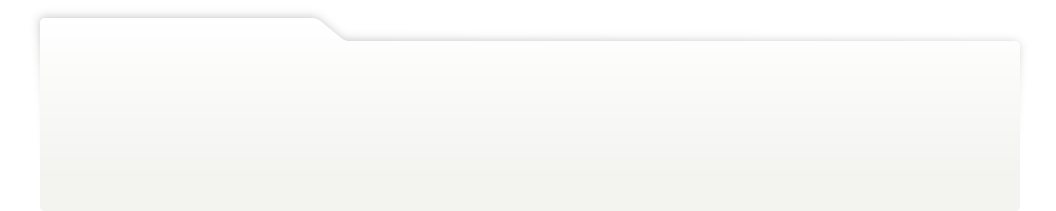
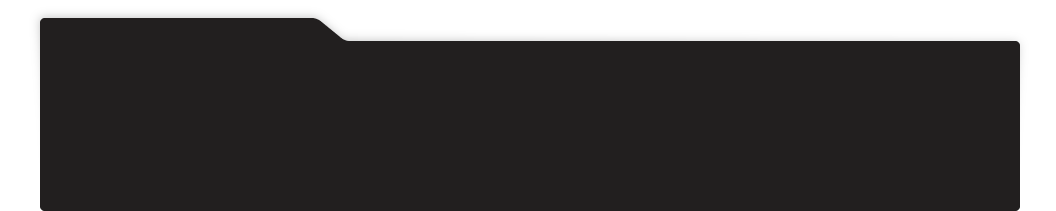
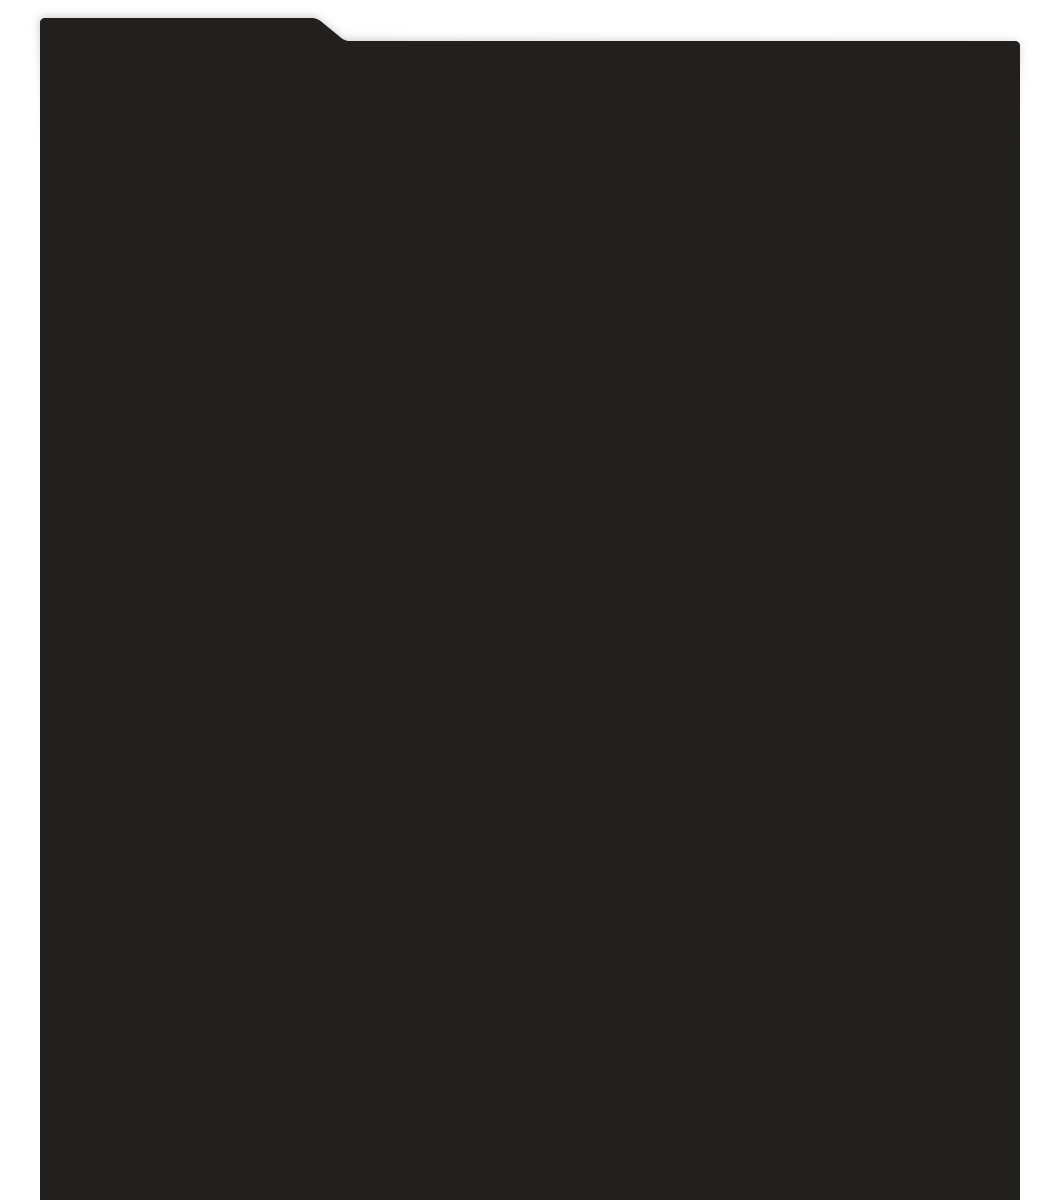
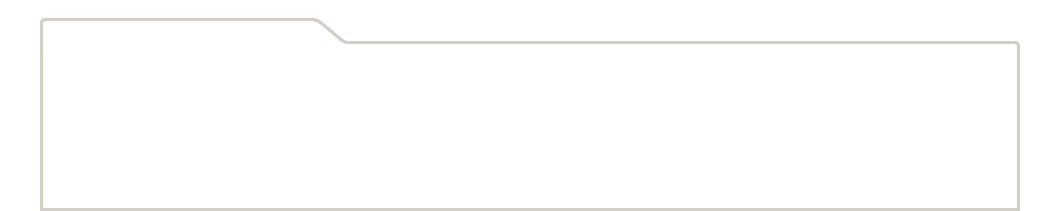
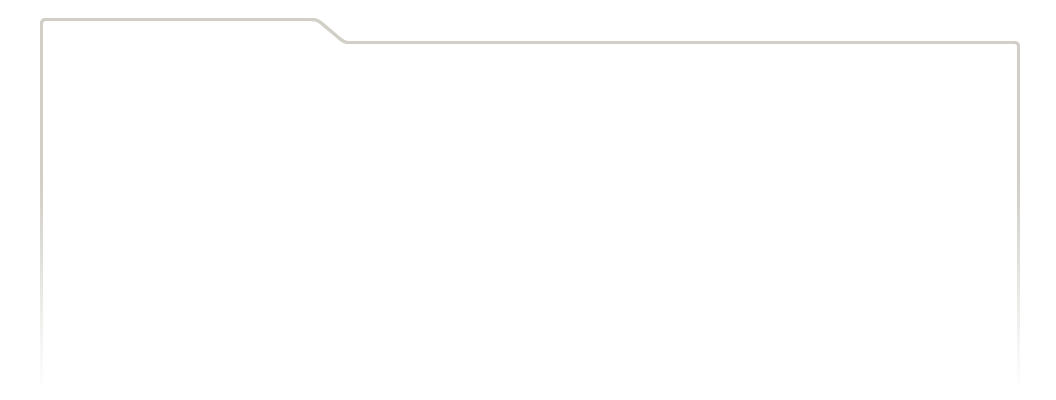
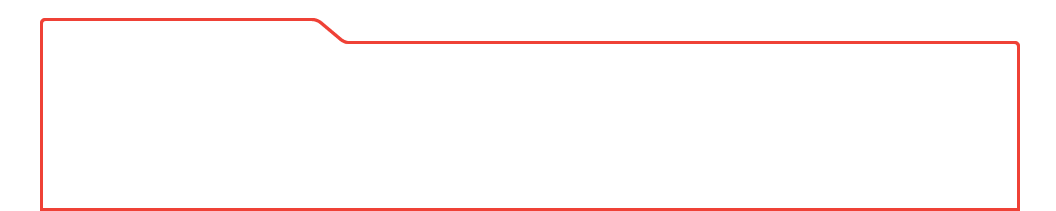
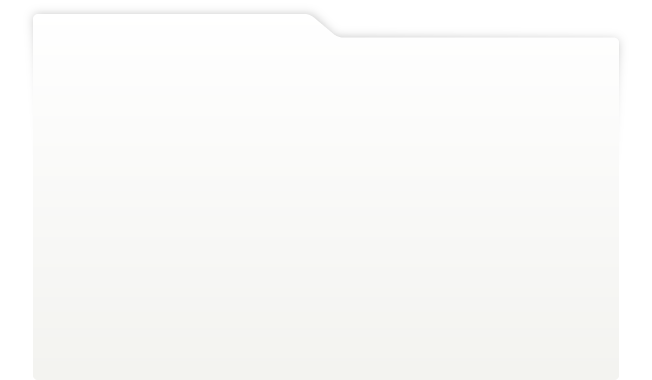
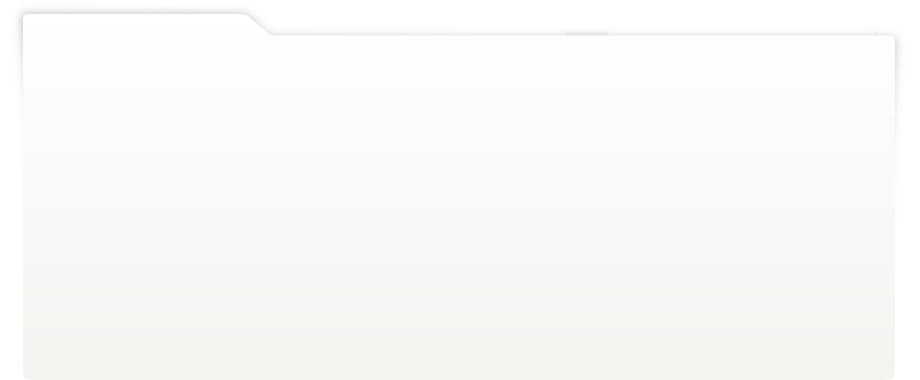
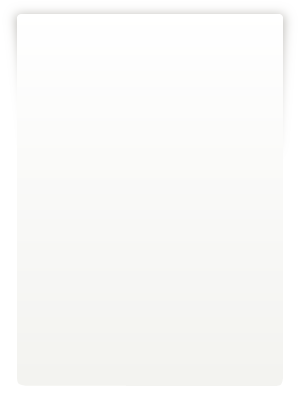
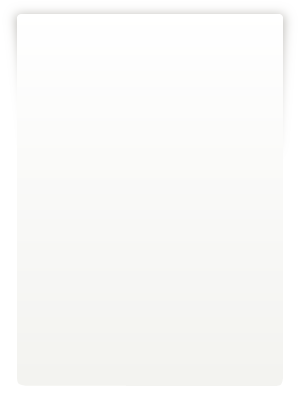
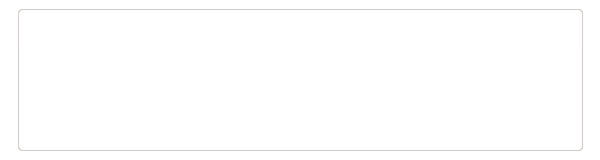
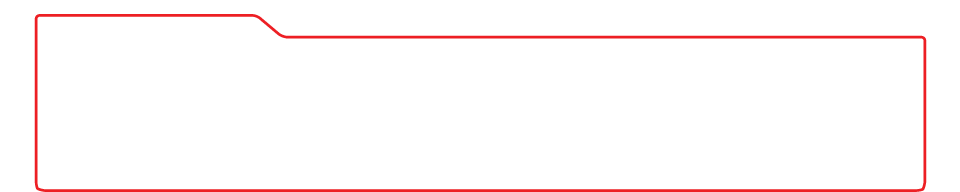
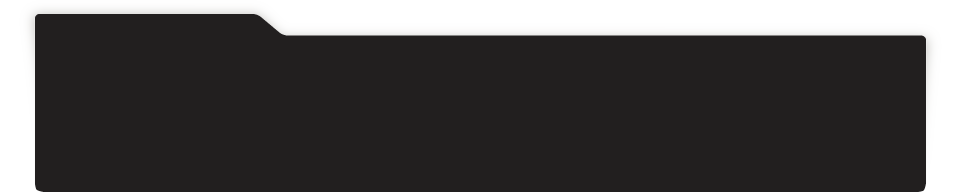
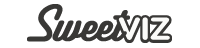
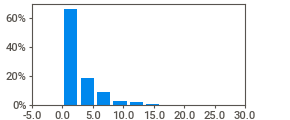
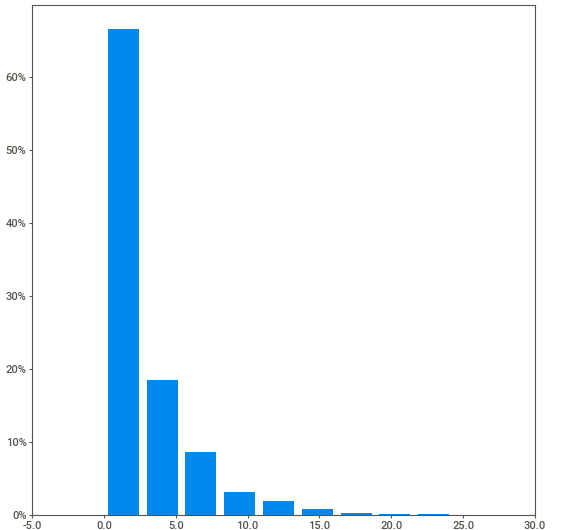
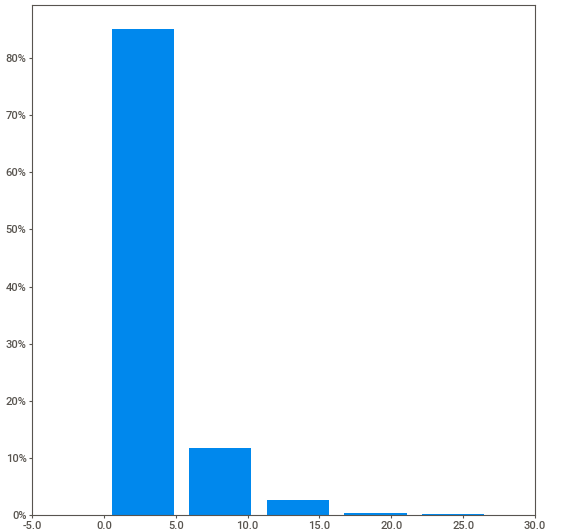
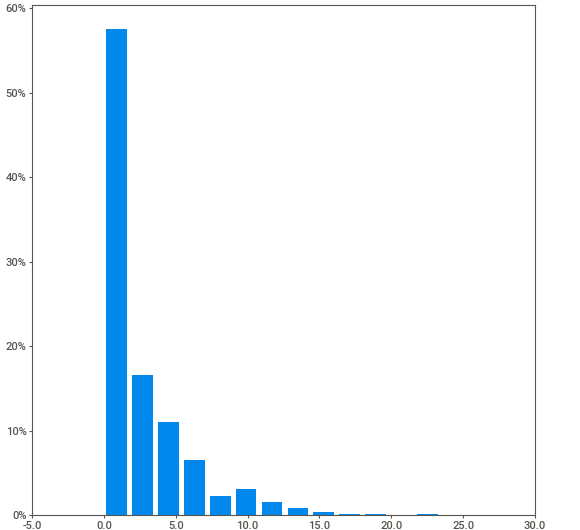
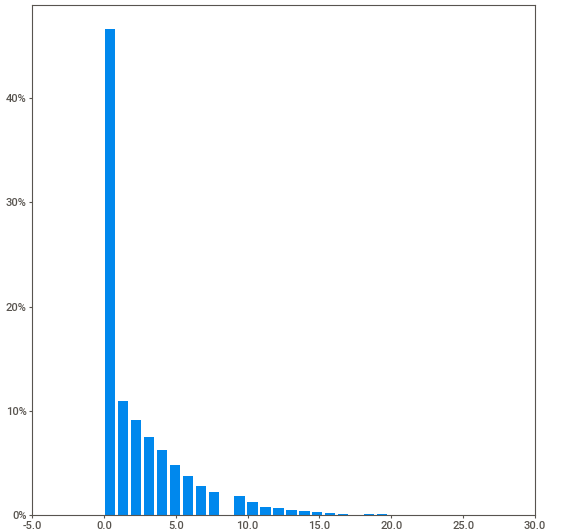
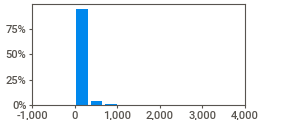
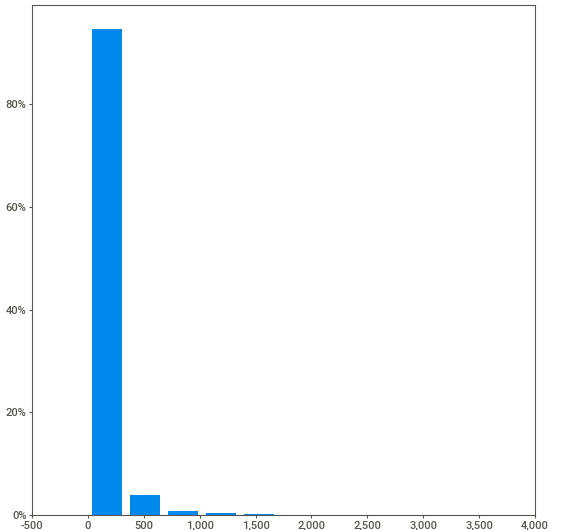
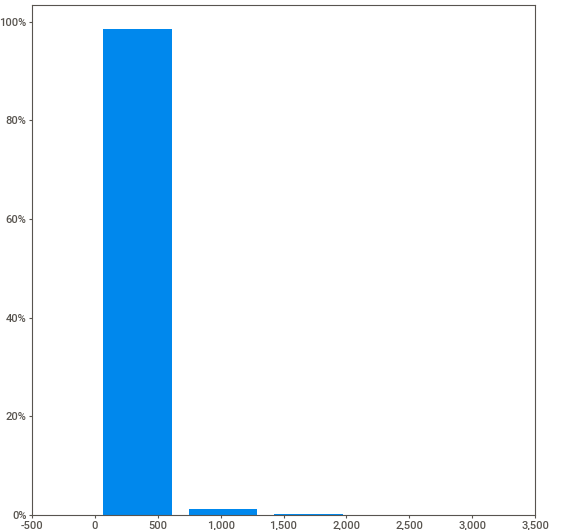
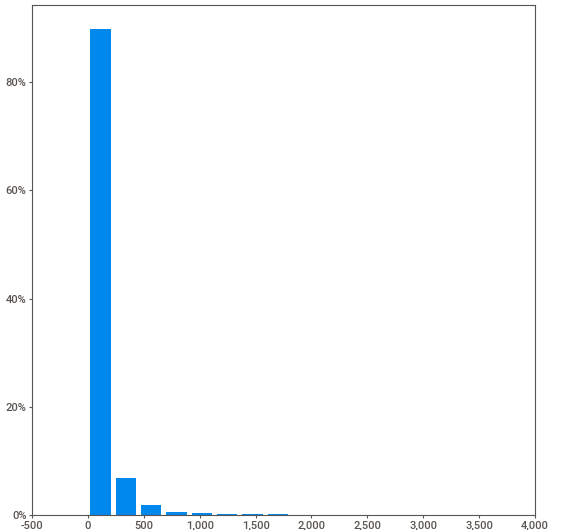
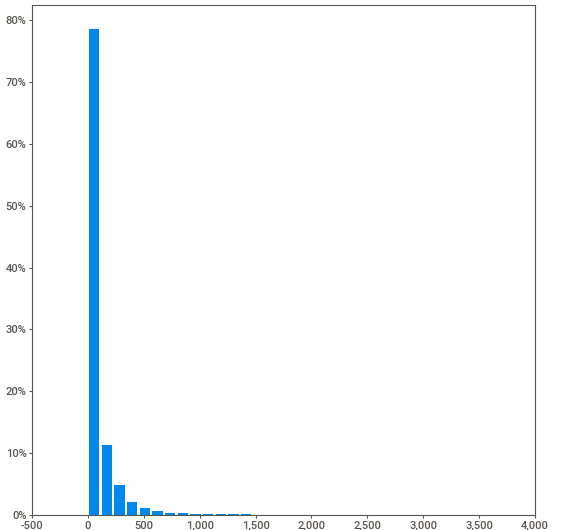
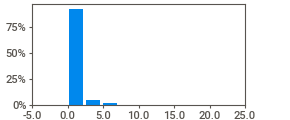
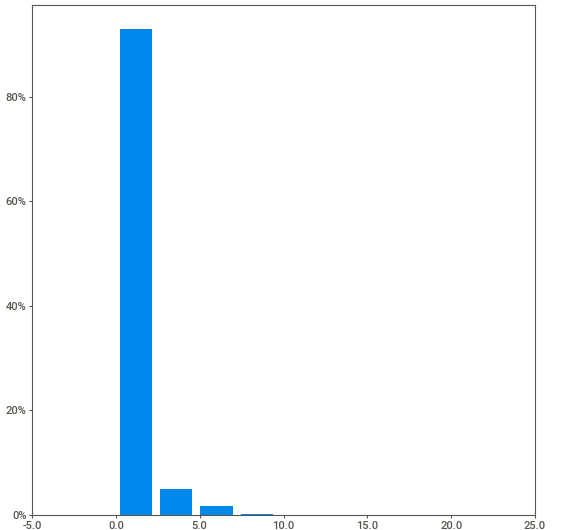
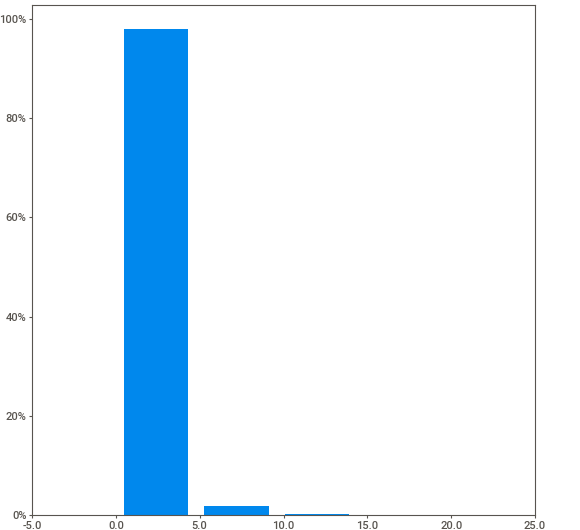
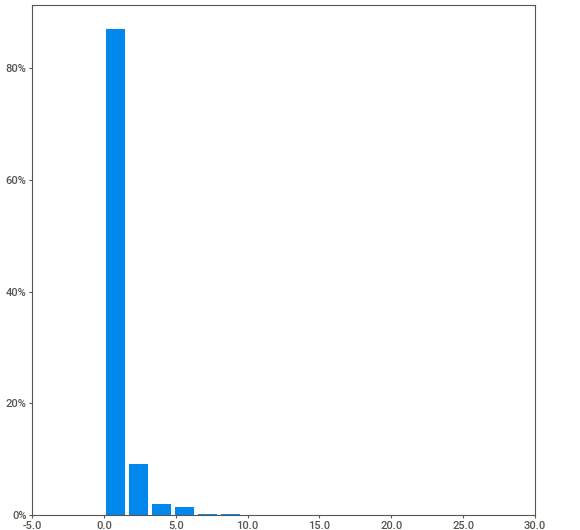
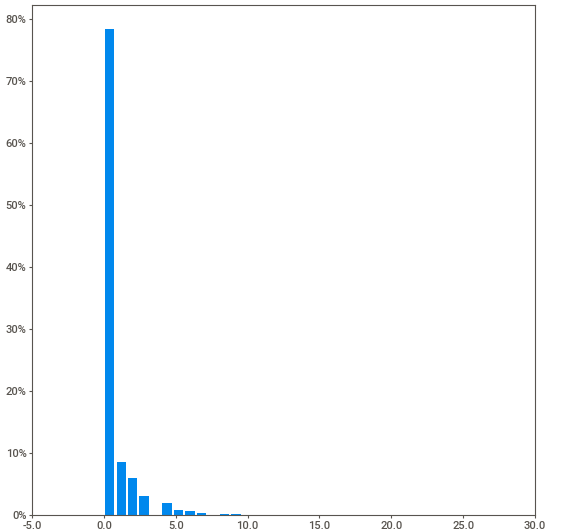
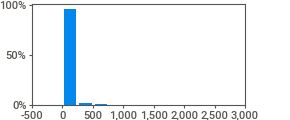
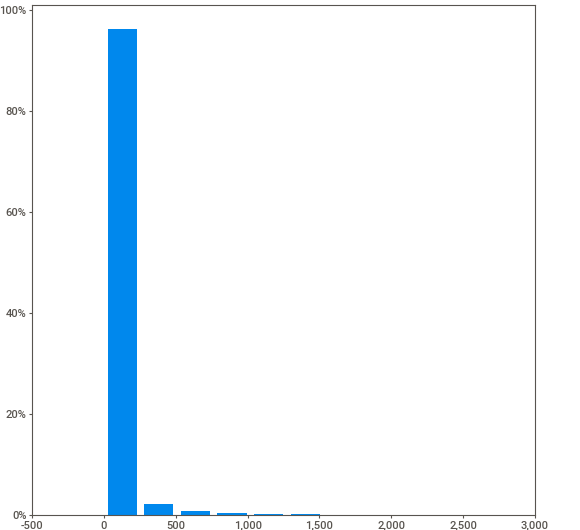
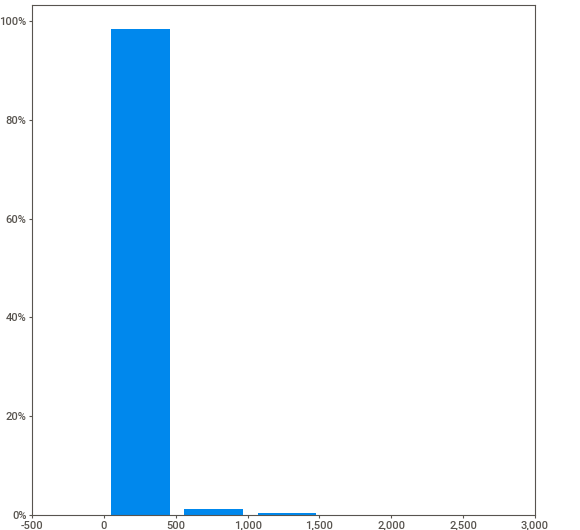
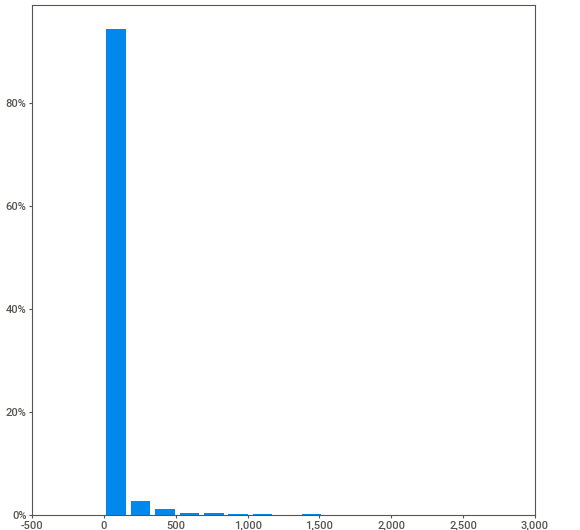
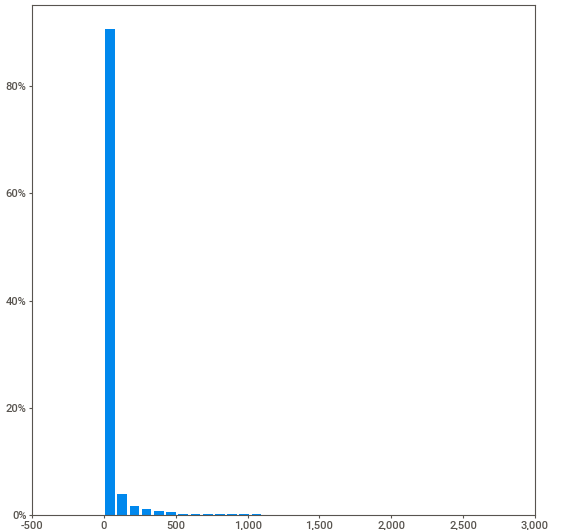
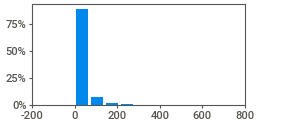
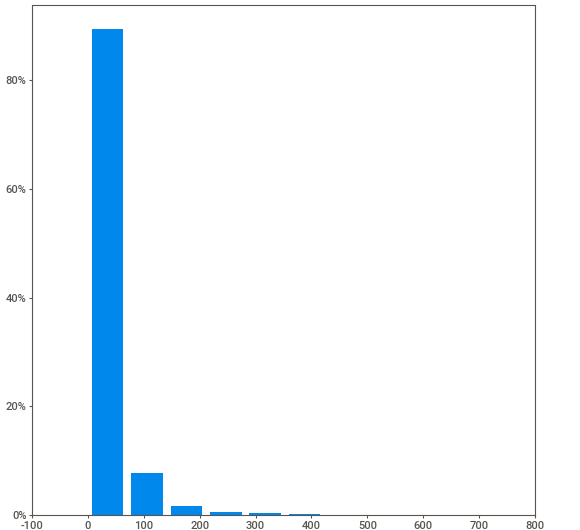
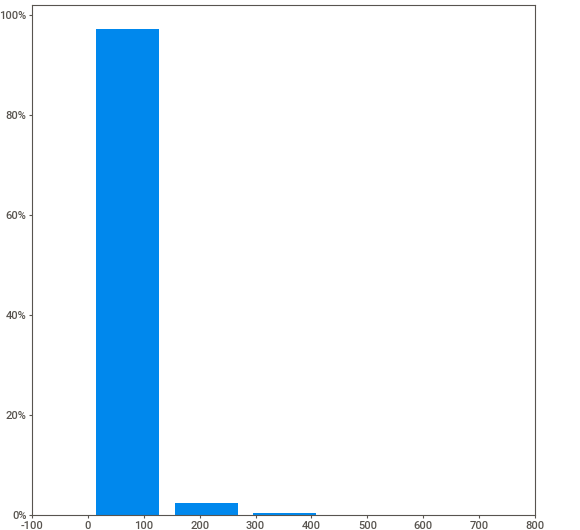
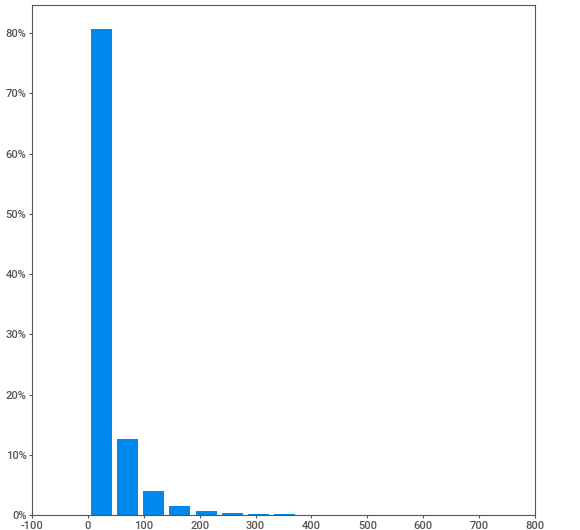
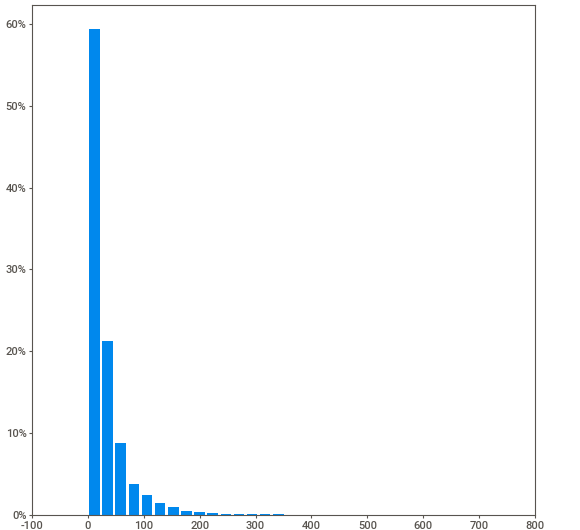
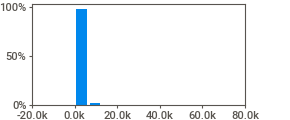
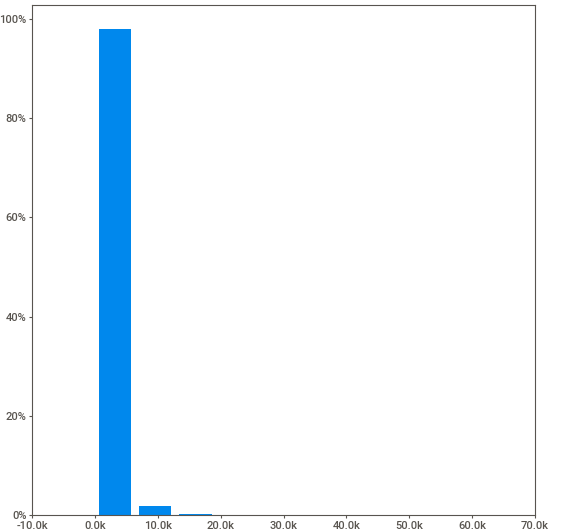
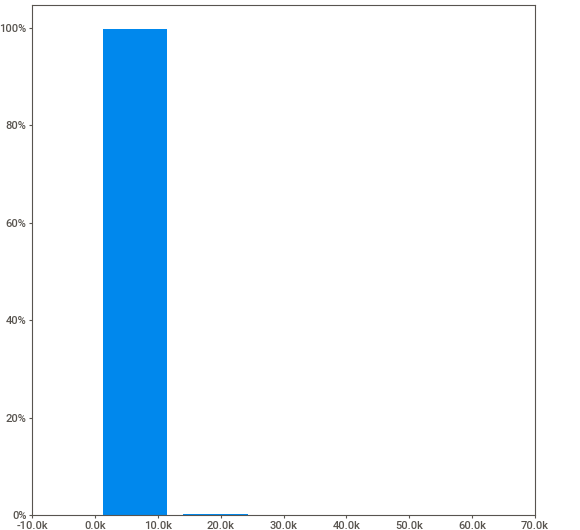
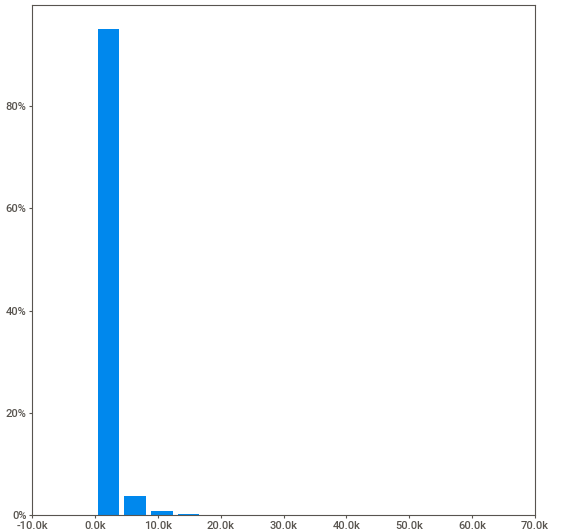
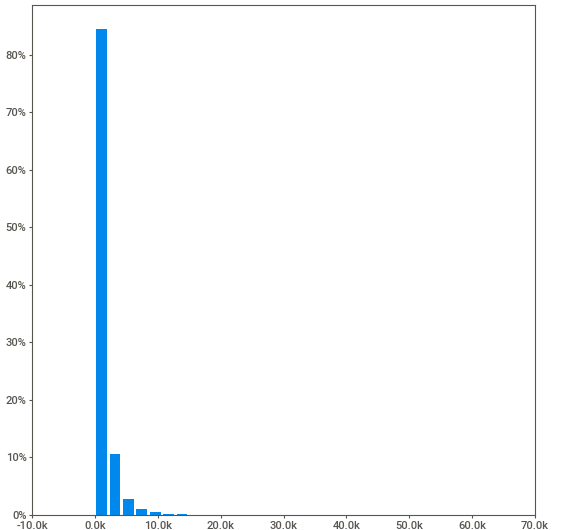
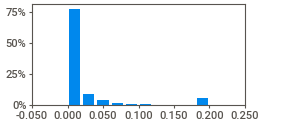
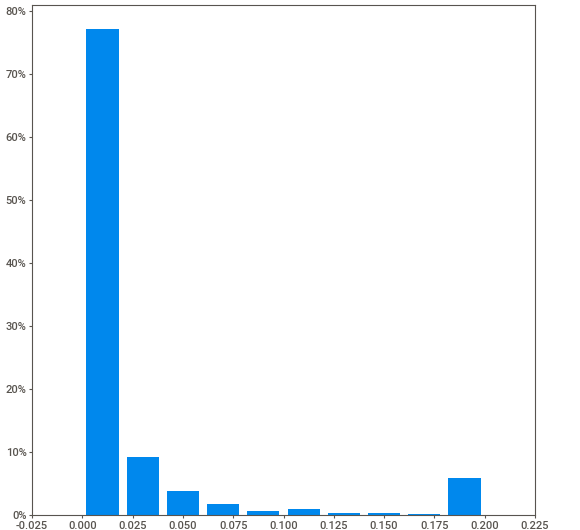
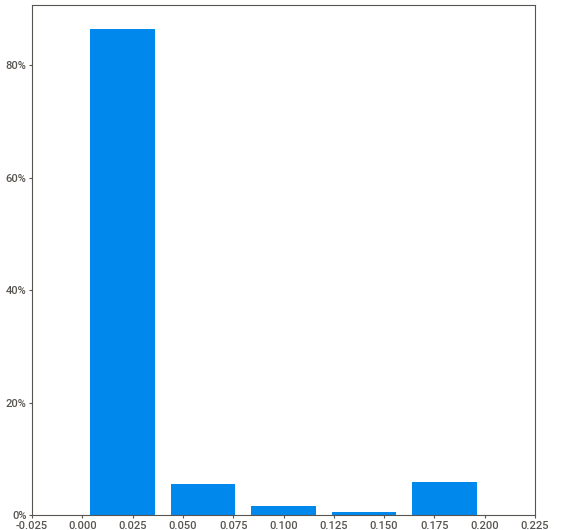
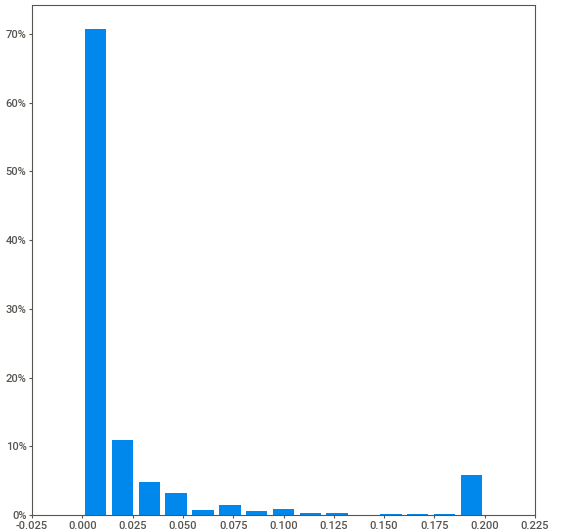
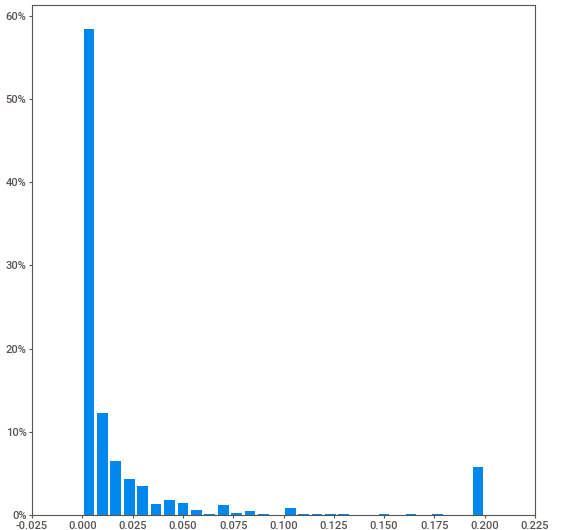
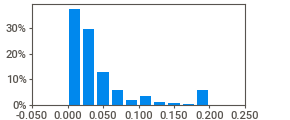
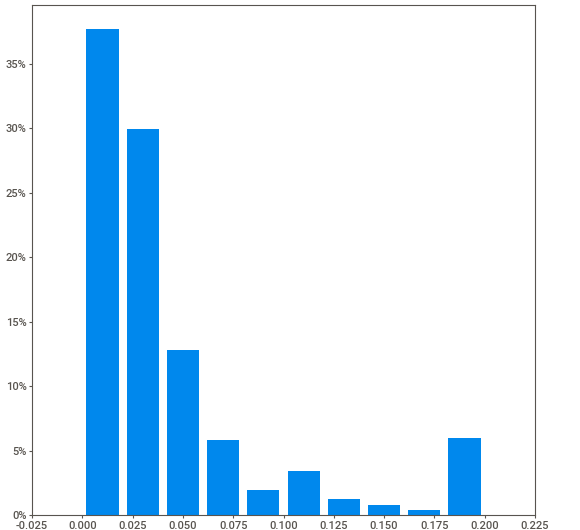
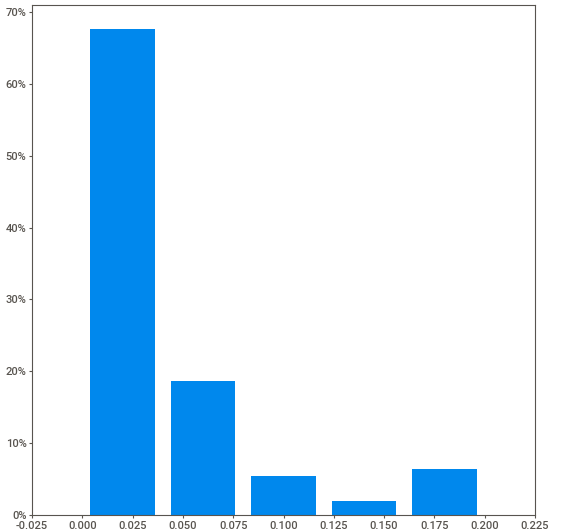
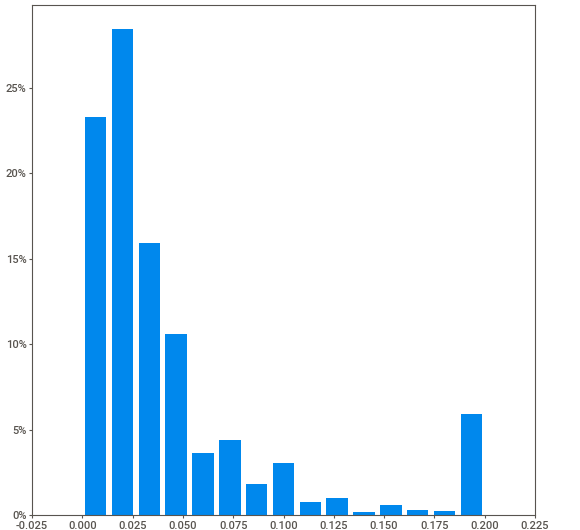
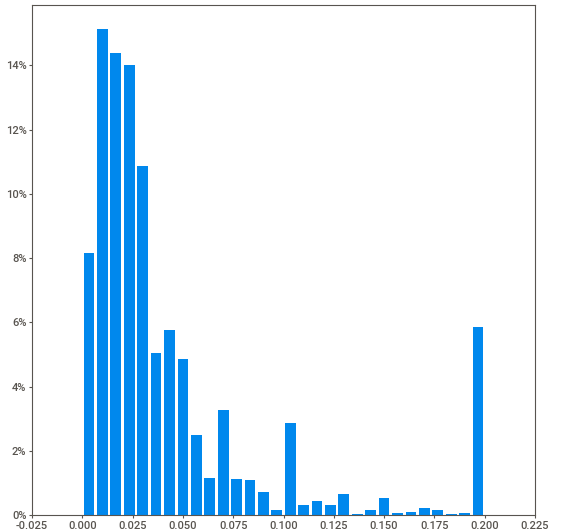
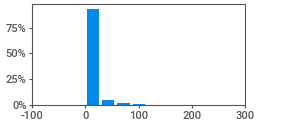
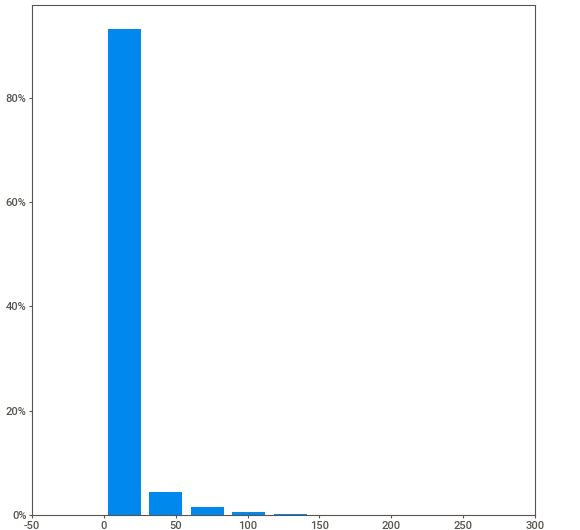
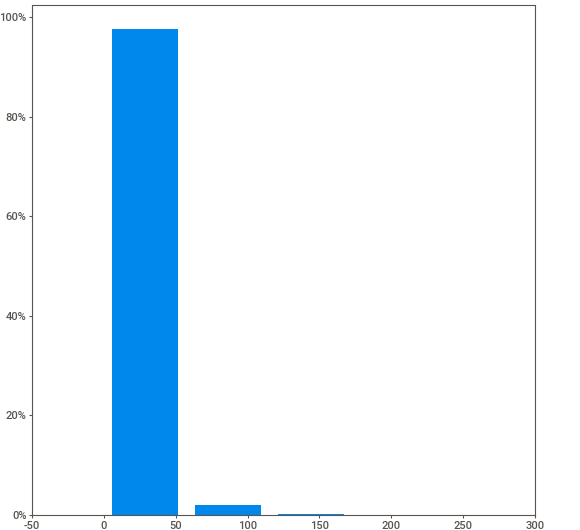
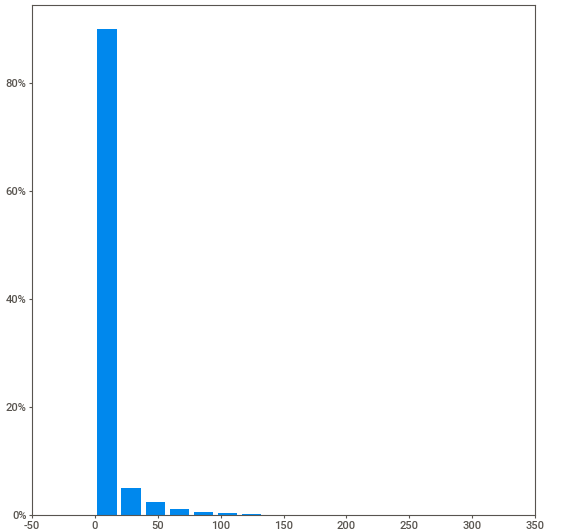
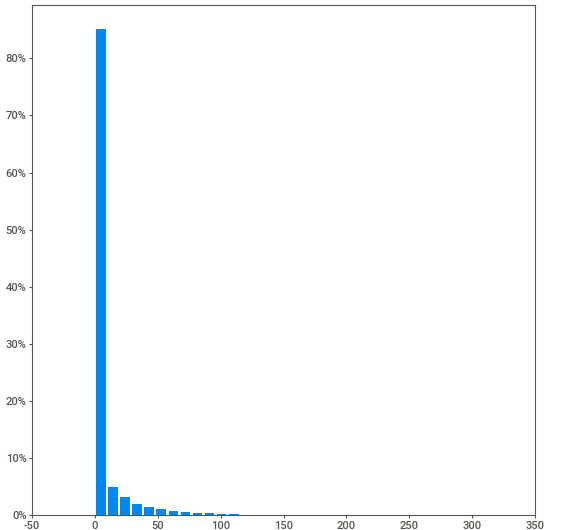
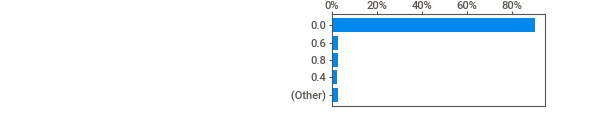
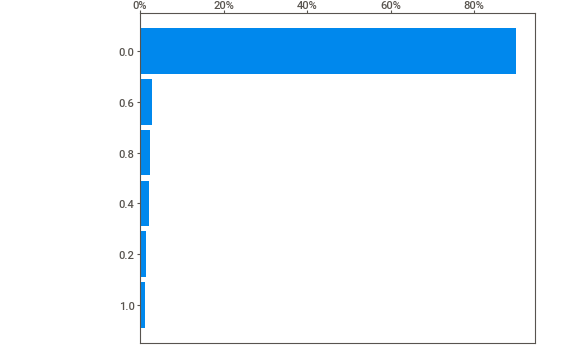
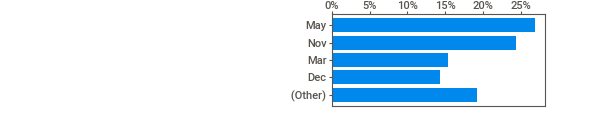
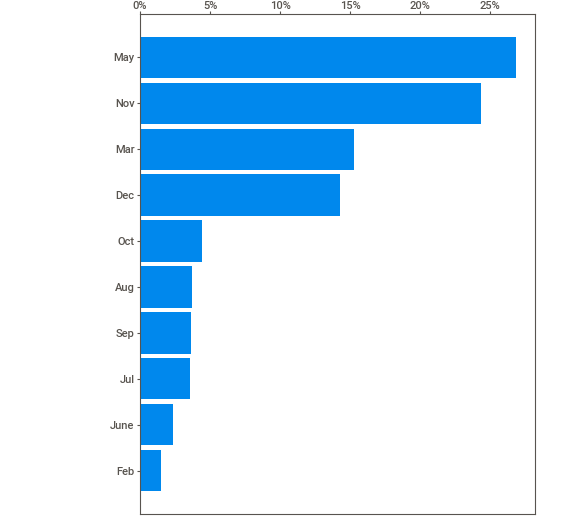
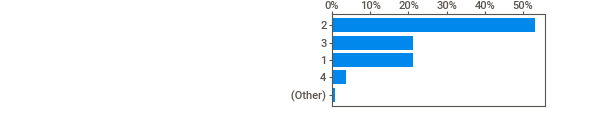
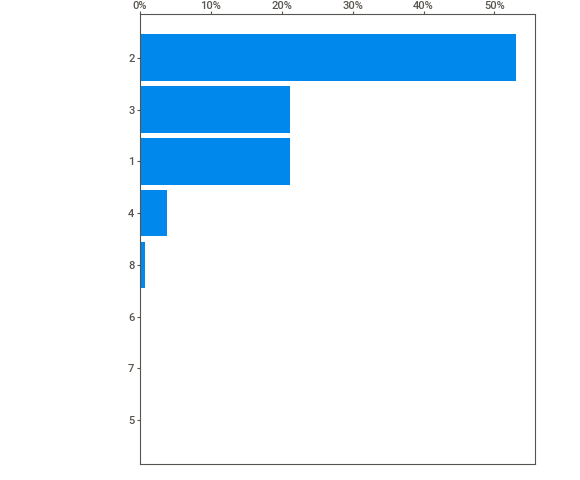
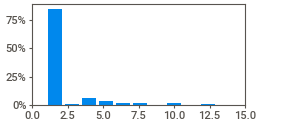
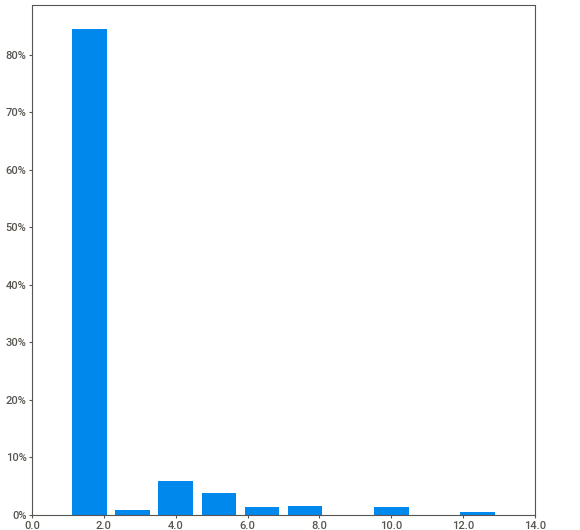
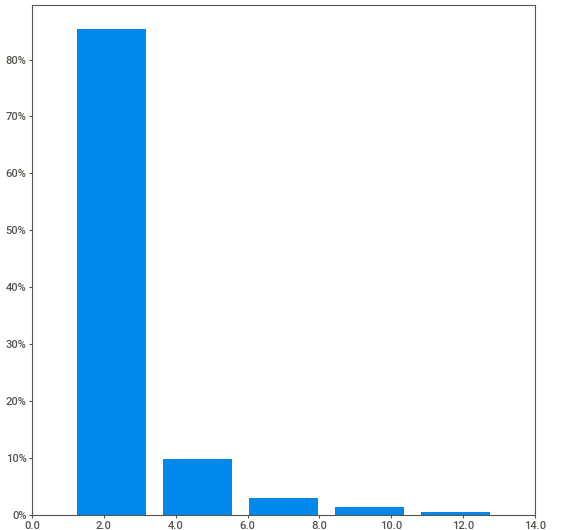
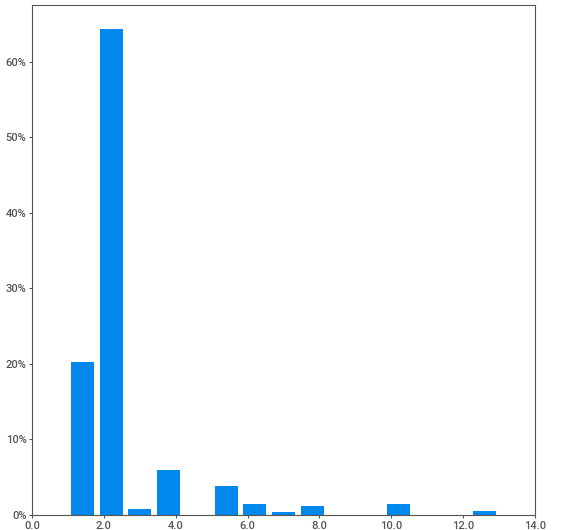
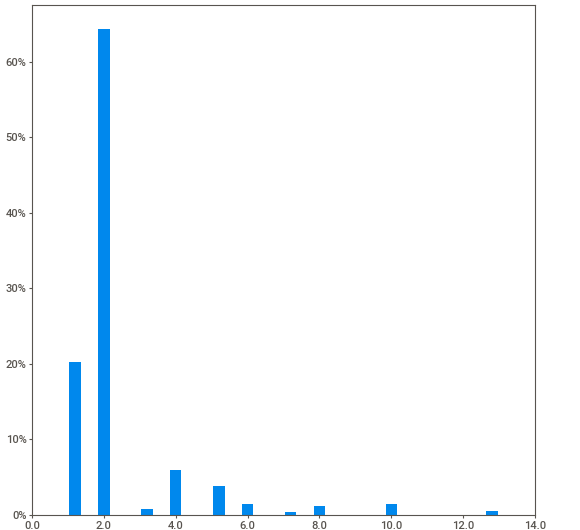
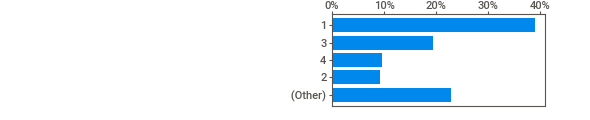
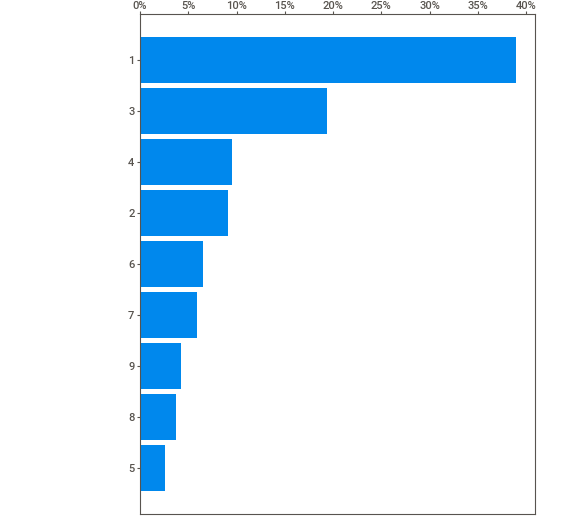
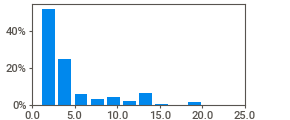
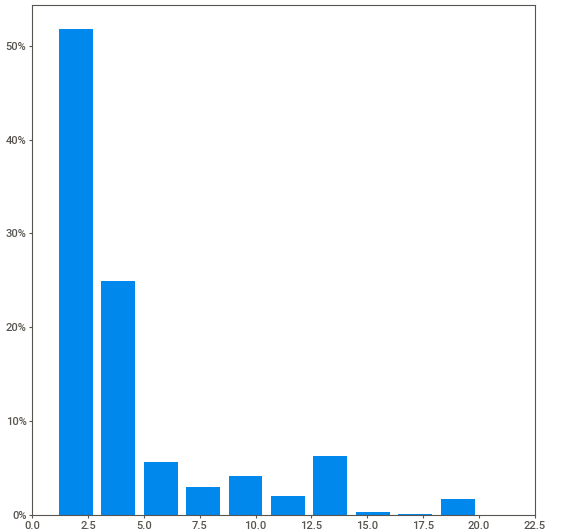
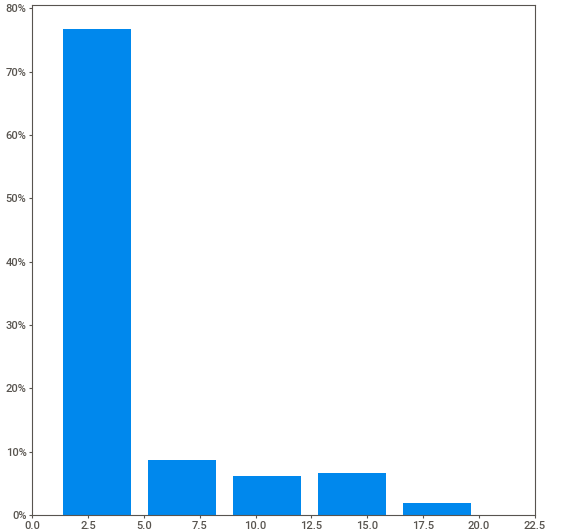
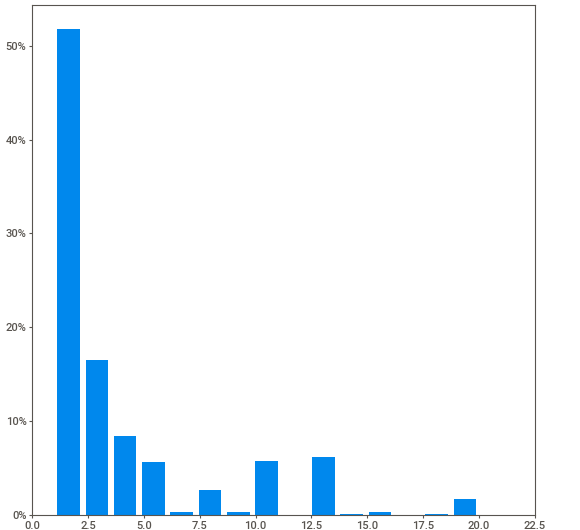
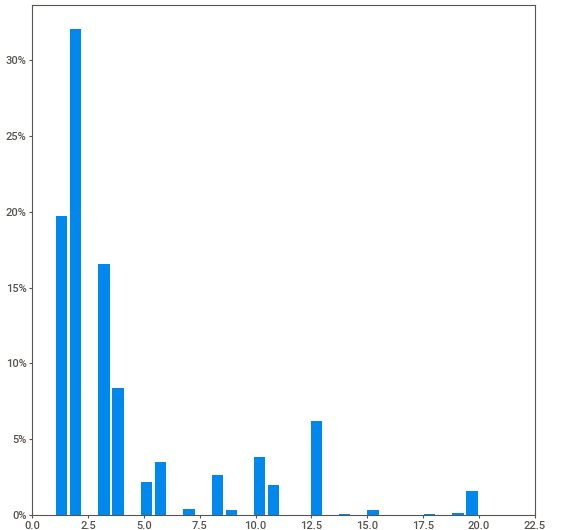
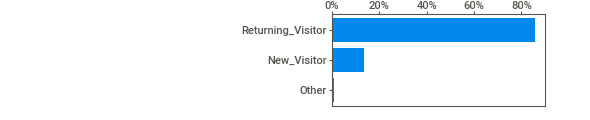
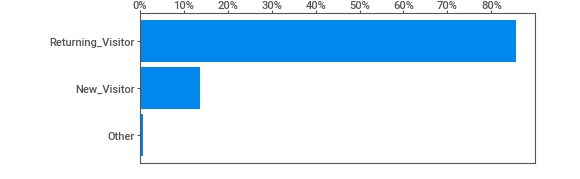
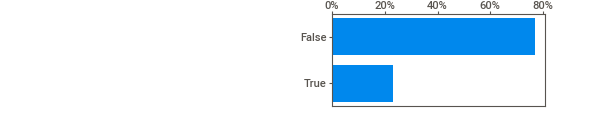
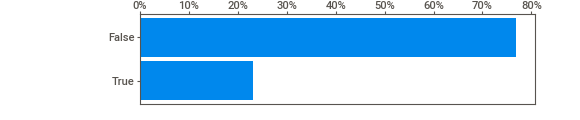
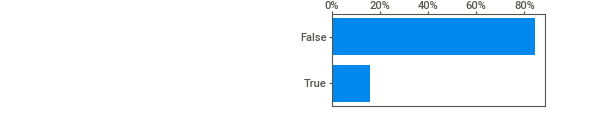
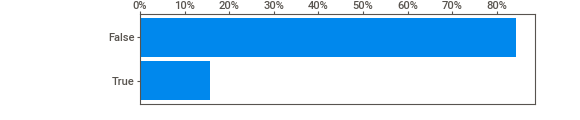
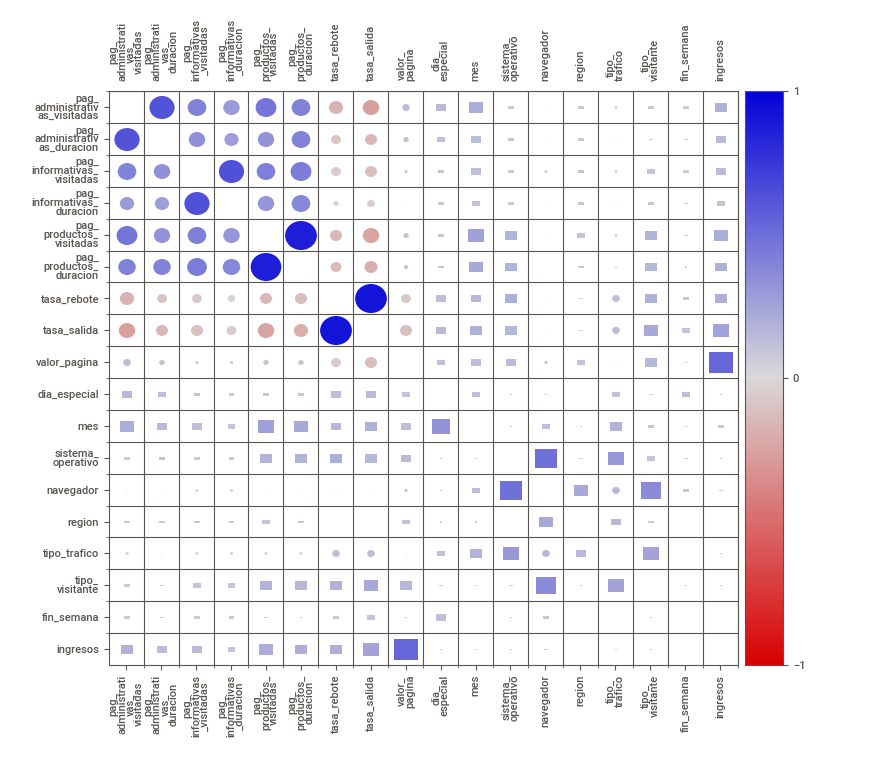
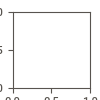

In [24]:
report.show_notebook()



---



# ***Analizando histogramas con boxplots***

In [25]:
px.histogram(clientes_train, x = clientes_train.pag_productos_duracion, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])

In [26]:
clientes_train.drop(clientes_train[clientes_train.pag_productos_duracion > 927.27].index, axis=0, inplace = True)



---



In [27]:
px.histogram(clientes_train, x = clientes_train.valor_pagina, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [28]:
px.histogram(clientes_train, x = clientes_train.tasa_rebote, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [29]:
px.histogram(clientes_train, x = clientes_train.tasa_salida, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [30]:
px.histogram(clientes_train, x = clientes_train.pag_productos_visitadas, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [31]:
px.histogram(clientes_train, x = clientes_train.pag_administrativas_visitadas, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [32]:
px.histogram(clientes_train, x = clientes_train.pag_administrativas_visitadas, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [33]:
px.histogram(clientes_train, x = clientes_train.pag_administrativas_duracion, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [34]:
px.histogram(clientes_train, x = clientes_train.pag_informativas_visitadas, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [35]:
px.histogram(clientes_train, x = clientes_train.pag_informativas_duracion, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [36]:
px.histogram(clientes_train, x = clientes_train.dia_especial, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [37]:
px.histogram(clientes_train, x = clientes_train.mes, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [38]:
px.histogram(clientes_train, x = clientes_train.sistema_operativo, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [39]:
px.histogram(clientes_train, x = clientes_train.navegador, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [40]:
px.histogram(clientes_train, x = clientes_train.region, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [41]:
px.histogram(clientes_train, x = clientes_train.tipo_trafico, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [42]:
px.histogram(clientes_train, x = clientes_train.tipo_visitante, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



In [43]:
px.histogram(clientes_train, x = clientes_train.fin_semana, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])



---



# ***Matriz de correlacion***

In [44]:
corr_matrix = clientes_test.select_dtypes(include=['float64', 'int']).corr(method='pearson')

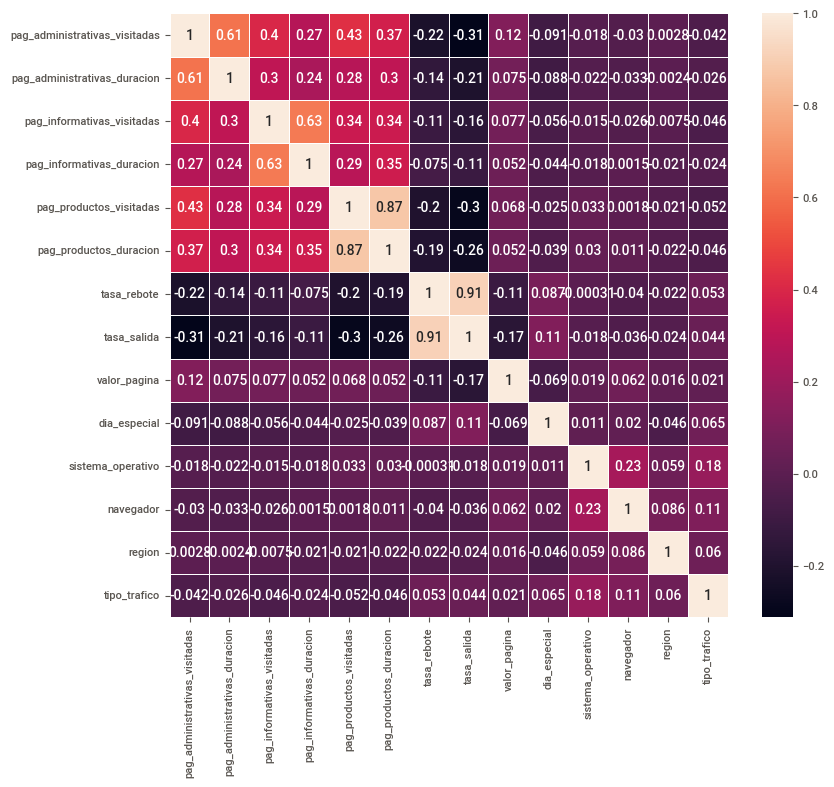

In [45]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

#**Creación del Modelo - Random Forest**

# **Configuracion inicial PyCaret**

In [46]:
clasificacion_clientes = setup(data=clientes_train, target="ingresos", session_id=123, test_data=clientes_test)

,Description,Value
0,Session id,123
1,Target,ingresos
2,Target type,Binary
3,Original data shape,"(8830, 18)"
4,Transformed data shape,"(8830, 20)"
5,Transformed train set shape,"(5748, 20)"
6,Transformed test set shape,"(3082, 20)"
7,Numeric features,14
8,Categorical features,2
9,Preprocess,True




---



# **Comparacion Modelos**

In [47]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9449,0.9366,0.6069,0.8444,0.7051,0.6756,0.6875,1.0700
et,Extra Trees Classifier,0.9389,0.9343,0.5446,0.8416,0.6600,0.6282,0.6469,1.1530
lr,Logistic Regression,0.9368,0.9105,0.5287,0.8352,0.6459,0.6132,0.6334,1.9150
svm,SVM - Linear Kernel,0.9351,0.0000,0.5843,0.7788,0.6562,0.6220,0.6359,0.2910
lda,Linear Discriminant Analysis,0.9328,0.9262,0.4776,0.8431,0.6078,0.5742,0.6030,0.3180
knn,K Neighbors Classifier,0.9222,0.8081,0.4045,0.7804,0.5319,0.4941,0.5264,0.3840
ridge,Ridge Classifier,0.9214,0.0000,0.3343,0.8680,0.4806,0.4471,0.5082,0.2780
dt,Decision Tree Classifier,0.9151,0.6799,0.3790,0.6979,0.4849,0.4447,0.4718,0.3110
gbc,Gradient Boosting Classifier,0.8944,0.9258,0.1229,0.7364,0.1997,0.1702,0.2571,0.7930
ada,Ada Boost Classifier,0.8925,0.8335,0.1227,0.6008,0.1973,0.1647,0.2296,0.7420


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



---



# **Generación del modelo de clasificación RANDOM FOREST**

In [48]:
modelo_01_clasificacion = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9409,0.9552,0.5714,0.8372,0.6792,0.6480,0.6623
1,0.9426,0.9238,0.5714,0.8571,0.6857,0.6555,0.6719
2,0.9496,0.9076,0.6349,0.8696,0.7339,0.7068,0.7175
3,0.9461,0.9402,0.6032,0.8636,0.7103,0.6816,0.6950
4,0.9478,0.9250,0.6825,0.8113,0.7414,0.7126,0.7159
5,0.9374,0.9523,0.5556,0.8140,0.6604,0.6272,0.6411
6,0.9374,0.9351,0.5556,0.8140,0.6604,0.6272,0.6411
7,0.9391,0.9298,0.5714,0.8182,0.6729,0.6405,0.6531
8,0.9443,0.9199,0.5806,0.8571,0.6923,0.6629,0.6781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
print(modelo_01_clasificacion)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)




---



**Optimizacion**

In [50]:
modelo_optimo = tune_model(modelo_01_clasificacion)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9478,0.8663,0.7619,0.7619,0.7619,0.7326,0.7326
1,0.9496,0.8534,0.7302,0.7931,0.7603,0.7322,0.7330
2,0.9478,0.8733,0.7778,0.7538,0.7656,0.7363,0.7364
3,0.9374,0.8604,0.7619,0.6957,0.7273,0.6920,0.6929
4,0.9391,0.8684,0.7778,0.7000,0.7368,0.7025,0.7038
5,0.9426,0.8634,0.7619,0.7273,0.7442,0.7119,0.7121
6,0.9339,0.8585,0.7619,0.6761,0.7164,0.6792,0.6807
7,0.9357,0.8386,0.7143,0.7031,0.7087,0.6725,0.6725
8,0.9443,0.8695,0.7742,0.7273,0.7500,0.7187,0.7191


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).




---



**NOTA : El modelo original es mejor que el optimizado por ello continuare con la evaluacion del modelo original.**



---




#**Evaluacion del modelo**

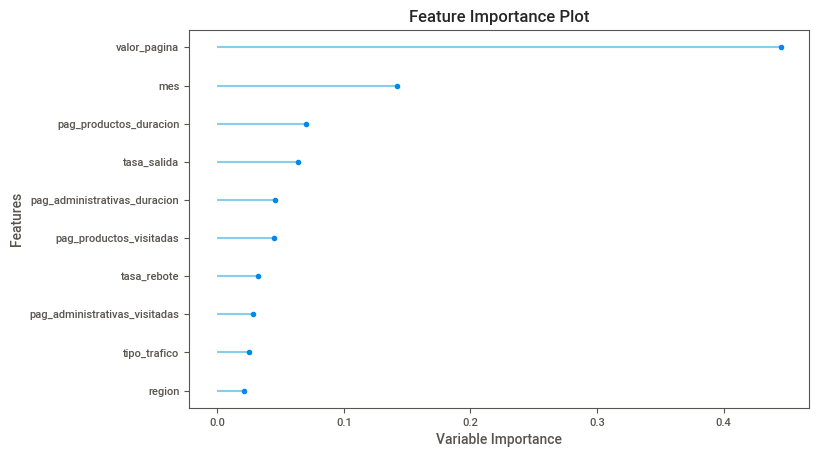

In [51]:
plot_model(modelo_01_clasificacion, plot = 'feature')

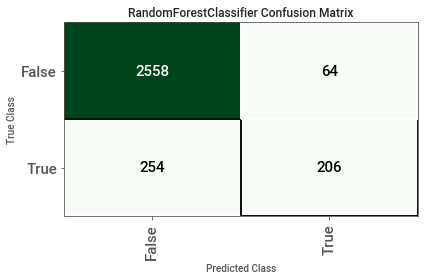

In [52]:
plot_model(modelo_01_clasificacion, plot = 'confusion_matrix')

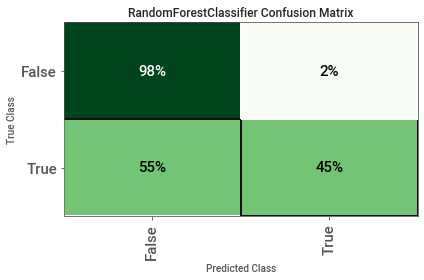

In [53]:
plot_model(modelo_01_clasificacion, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

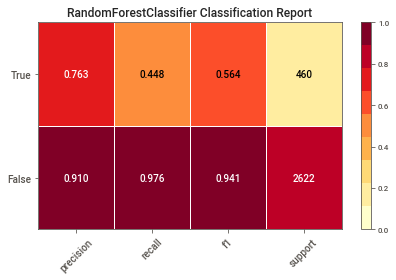

In [54]:
plot_model(modelo_01_clasificacion, plot="class_report")

# **Generacion de segundo modelo - Naive Bayes**

**NOTA : En este punto me di cuenta de que si bien usando Random Forest nuestra metrica de accuracy es alta, segun nuestra matriz de confusion este modelo predice muy bien los valores negativos (clientes no contratan) pero tiene un alto false positive, lo cual no seria optimo para el negocio. Es por ello que basandome en la comparacion de modelos, en la columna recall, opte por generar un segundo modelo que estoy segura podria mejorar mis predicciones y asi brindar un mejor modelo de prediccion al cliente.**


Guiandome por la metrica de recall, al armar este modelo espero mejorar la prediccion de mis true positives

***Naive Bayes - Modelo original***

In [55]:
modelo_02_clasificacion = create_model("nb")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8330,0.8842,0.7778,0.3740,0.5052,0.4192,0.4599
1,0.8435,0.8719,0.7143,0.3846,0.5000,0.4170,0.4451
2,0.8243,0.8787,0.7302,0.3538,0.4767,0.3861,0.4227
3,0.8417,0.8713,0.7460,0.3852,0.5081,0.4250,0.4580
4,0.8261,0.8978,0.8254,0.3688,0.5098,0.4223,0.4731
5,0.8191,0.9113,0.7460,0.3481,0.4747,0.3825,0.4231
6,0.8470,0.8966,0.7937,0.4000,0.5319,0.4521,0.4901
7,0.8452,0.8773,0.7460,0.3917,0.5137,0.4321,0.4638
8,0.7753,0.7909,0.6613,0.2752,0.3886,0.2786,0.3189


Processing:   0%|          | 0/4 [00:00<?, ?it/s]



---



***Naive Bayes - Modelo optimizado***

In [56]:
modelo_optimo_02 = tune_model(modelo_02_clasificacion)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9148,0.8928,0.6190,0.6094,0.6142,0.5663,0.5663
1,0.9252,0.8604,0.6349,0.6667,0.6504,0.6086,0.6088
2,0.9113,0.8896,0.6032,0.5938,0.5984,0.5486,0.5486
3,0.9165,0.8836,0.6349,0.6154,0.6250,0.5780,0.5781
4,0.9113,0.8968,0.6349,0.5882,0.6107,0.5607,0.5612
5,0.9026,0.9219,0.6032,0.5507,0.5758,0.5209,0.5216
6,0.9183,0.8858,0.6825,0.6143,0.6466,0.6005,0.6016
7,0.9217,0.8848,0.6667,0.6364,0.6512,0.6071,0.6073
8,0.9042,0.8342,0.5645,0.5556,0.5600,0.5062,0.5063


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits




---



**En este punto si bien el modelo optimizado no pareciera mejorar respecto del original, continuare con la evaluacion de ambos para luego tomar una decision final al comparar los resultados.**




---



***Modelo 02 naive bayes original - Matriz de confusion***

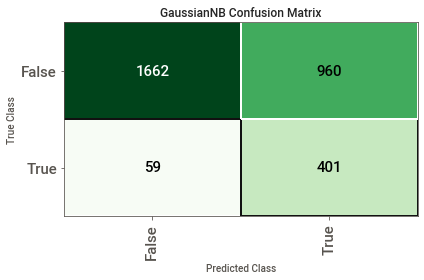

In [57]:
plot_model(modelo_02_clasificacion, plot = 'confusion_matrix')



---



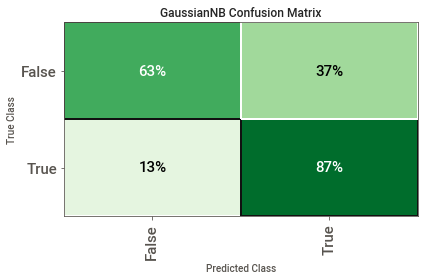

In [58]:
plot_model(modelo_02_clasificacion, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})



---



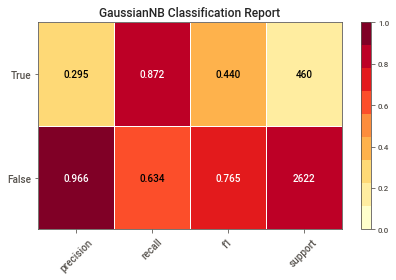

In [59]:
plot_model(modelo_02_clasificacion, plot="class_report")



---



***Modelo 02 naive bayes optimizado - Matriz de confusion***

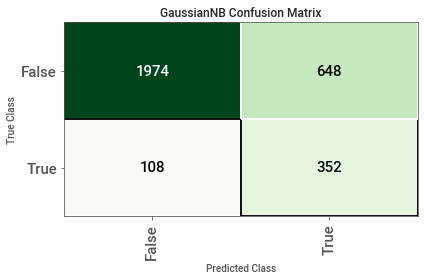

In [60]:
plot_model(modelo_optimo_02, plot = 'confusion_matrix')



---



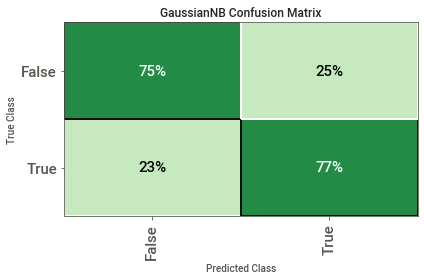

In [61]:
plot_model(modelo_optimo_02, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})



---



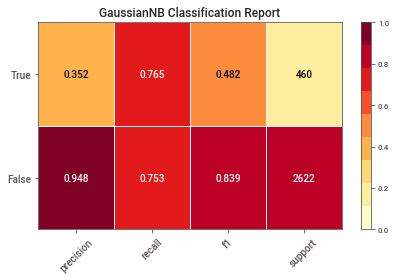

In [62]:
plot_model(modelo_optimo_02, plot="class_report")



---



**Nota : Basandome en el analisis de los modelos generados, considero que el modelo_optimo_02 de Naive Bayes me brindara mejor resultados considerando como aceptable los valor de 75%, 77% de aciertos (true positives, true negatives), de esta manera no tendre tantos false negative y false positives que considero es algo importante para el negocio.**

#**Predecimos con el conjunto de datos no vistos - clientes_test**


In [63]:
prediccion_modelo_02 = predict_model(modelo_optimo_02, data = clientes_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7547,0.7590,0.7652,0.3520,0.4822,0.3491,0.3943


In [64]:
prediccion_modelo_02.head(10)

,pag_administrativas_visitadas,pag_administrativas_duracion,pag_informativas_visitadas,pag_informativas_duracion,pag_productos_visitadas,pag_productos_duracion,tasa_rebote,tasa_salida,valor_pagina,dia_especial,...,sistema_operativo,navegador,region,tipo_trafico,tipo_visitante_New_Visitor,tipo_visitante_Returning_Visitor,tipo_visitante_Other,fin_semana,ingresos,prediction_label
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,...,4.0,1.0,9.0,3.0,0.0,1.0,0.0,False,False,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,...,1.0,2.0,1.0,5.0,0.0,1.0,0.0,True,False,0
2,0.0,0.0,0.0,0.0,3.0,395.0,0.0,0.066667,0.0,0.0,...,1.0,1.0,3.0,3.0,0.0,1.0,0.0,False,False,0
3,0.0,0.0,0.0,0.0,7.0,280.5,0.0,0.028571,0.0,0.0,...,1.0,1.0,1.0,3.0,0.0,1.0,0.0,False,False,0
4,0.0,0.0,0.0,0.0,6.0,98.0,0.0,0.066667,0.0,0.0,...,2.0,5.0,1.0,3.0,0.0,1.0,0.0,False,False,0
5,0.0,0.0,0.0,0.0,13.0,334.966675,0.0,0.007692,0.0,0.0,...,1.0,1.0,1.0,4.0,0.0,1.0,0.0,True,False,0
6,0.0,0.0,0.0,0.0,3.0,105.0,0.0,0.033333,0.0,0.0,...,3.0,2.0,1.0,5.0,0.0,1.0,0.0,False,False,0
7,0.0,0.0,0.0,0.0,3.0,78.0,0.0,0.066667,0.0,0.0,...,1.0,2.0,6.0,6.0,0.0,1.0,0.0,True,False,0
8,0.0,0.0,0.0,0.0,10.0,183.666672,0.04,0.08,0.0,0.0,...,1.0,1.0,3.0,1.0,0.0,1.0,0.0,False,False,0
9,0.0,0.0,0.0,0.0,14.0,380.5,0.014286,0.028571,0.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,0.0,False,False,0


**Exportar los resultados de la prediccion de mi modelo como csv**

In [67]:
prediccion_modelo_02.to_csv('data_frame_final.csv')


# **Finalizando y guardando el modelo generado**

In [65]:
finalize_model(modelo_optimo_02)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pag_administrativas_visitadas',
                                             'pag_administrativas_duracion',
                                             'pag_informativas_visitadas',
                                             'pag_informativas_duracion',
                                             'pag_productos_visitadas',
                                             'pag_productos_duracion',
                                             'tasa_rebote', 'tasa_salida',
                                             'valor_pagina', 'dia_especial',
                                             'sistem...
                                    transformer=LeaveOneOutEncoder(cols=['mes'],
                                                                   drop_invariant=False,
                                         

In [66]:
save_model(modelo_optimo_02, "modelo_optimo_02")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pag_administrativas_visitadas',
                                              'pag_administrativas_duracion',
                                              'pag_informativas_visitadas',
                                              'pag_informativas_duracion',
                                              'pag_productos_visitadas',
                                              'pag_productos_duracion',
                                              'tasa_rebote', 'tasa_salida',
                                              'valor_pagina', 'dia_especial',
                                              'sistem...
                                     transformer=LeaveOneOutEncoder(cols=['mes'],
                                                                    drop_invariant=False,
                           